In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split



from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

## Import and clean data for use in models

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df =  pd.read_csv('Banking Dataset - Marketing Targets.csv',sep =";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [32]:
df.shape

(4521, 17)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [46]:
df.std()

age           9.867949
balance     882.680979
day           8.336248
duration    146.238304
campaign      1.351701
y             0.235415
dtype: float64

In [34]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [35]:
num_col=df.select_dtypes(exclude='object')
cat_col=df.select_dtypes(include='object')

In [36]:
num_col.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [37]:
cat_col.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

### Outlair Detection

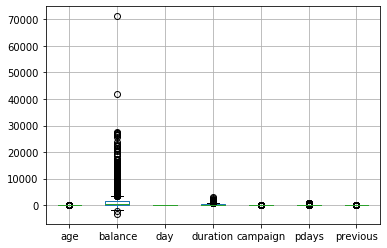

In [38]:
df.boxplot()

In [39]:
Q1 = df.drop(['y'], axis=1).quantile(0.25)

Q3 = df.drop(['y'], axis=1).quantile(0.75)


IQR = Q3 - Q1

print(IQR)

age           16.0
balance     1411.0
day           12.0
duration     225.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


In [40]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [41]:
df.shape

(2803, 17)

In [42]:
df=df.drop(columns=['pdays','previous','job'],inplace=False)

In [43]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [44]:
df.y.replace(('yes', 'no'), (0, 1), inplace=True)

### Prepairing for test train data for model creation

In [45]:
ss = StandardScaler()
df_scaled = ss.fit_transform(df)
X = pd.DataFrame(df_scaled, columns=df.columns)
X.head()

ValueError: could not convert string to float: 'married'

In [ ]:
X = df.drop(columns=['y'])
y = df['y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training size = " + str(X_train.shape[0]))
print("Testing size = " + str(X_test.shape[0]))

In [ ]:
seed = 404
np.random.seed(seed)

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cv_score = cross_val_score(gnb, X_train, y_train.values.ravel(), cv=kfold)
gnb_score = cv_score.mean()
print('Gaussian Naive Bayes K-fold Scores:')
print(cv_score)
print()
print('Gaussian Naive Bayes Average Score:')
print(gnb_score)
print()

In [ ]:
df.std()